# Siamese Convolutional Neural Network

In [1]:
# Load the required libraries
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Model, Sequential
from keras.layers import Flatten, Lambda, Dense, Conv2D, Conv2DTranspose
from keras.layers import ZeroPadding2D, Activation, Input, Concatenate, Reshape
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras import backend as K

import cv2
import os
import numpy as np
import pandas as pd
%tensorflow_version 1.x
import tensorflow as tf
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
'''
Build the model to generate the features with.
'''

width, height = 512, 512
threshold = 100
emergency = False

# Load a popular model
premodel = VGG16(weights='imagenet', include_top=False, input_shape = (width, height, 3))

# Add a custom layer
flatten = Flatten()(premodel.output)

# Create the final model
model = Model(input = premodel.input, output = flatten)

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()





58892288/58889256 [==============================] - 6s 0us/step








Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fl...)`
  if sys.path[0] == '':


In [68]:
'''
Generate the features of each image pair and calculate their differences.
'''

# Location of the frame images
folder_path = '/content/drive/My Drive/Masters/Colab Notebooks/Research Code/data/'
folder = 'positive-daylight/'

counter = 0         # will be counting the iterations and number of frames to use.
evaluate = True

step = 2            # used to calculate the number of frames to use
feature_array = np.array([])

fps = 2                     # frames per seconds
total_frames = 60 * fps     # total frames to read in 60 seconds

'''
Run the main task to generate features and their distances. Save the distances
in a file and export.
'''
while evaluate:
    # Load and preprocess two images
    img_a_path = folder_path + folder + 'frame%d.jpg' % counter
    img_b_path = folder_path + folder + 'frame%d.jpg' % (counter + step)

    # Load the images
    img_a = image.load_img(img_a_path, target_size=(width, height))
    img_b = image.load_img(img_b_path, target_size=(width, height))

    # Convert images to arrays
    img_a = image.img_to_array(img_a)
    img_b = image.img_to_array(img_b)

    # Insert a new axis to match the model requirements
    img_a = np.expand_dims(img_a, axis=0)
    img_b = np.expand_dims(img_b, axis=0)

    # Preprocess images
    img_a = preprocess_input(img_a)
    img_b = preprocess_input(img_b)

    img_a_feat = model.predict(img_a)
    img_b_feat = model.predict(img_b)

    feat_dist = np.linalg.norm(img_a_feat - img_b_feat)

    feature_array = np.append(feature_array, feat_dist)

    counter = counter + step

    if counter >= total_frames - (1 + step):
        evaluate = False

    print('Iteration %d' % counter)

Iteration 2
Iteration 4
Iteration 6
Iteration 8
Iteration 10
Iteration 12
Iteration 14
Iteration 16
Iteration 18
Iteration 20
Iteration 22
Iteration 24
Iteration 26
Iteration 28
Iteration 30
Iteration 32
Iteration 34
Iteration 36
Iteration 38
Iteration 40
Iteration 42
Iteration 44
Iteration 46
Iteration 48
Iteration 50
Iteration 52
Iteration 54
Iteration 56
Iteration 58
Iteration 60
Iteration 62
Iteration 64
Iteration 66
Iteration 68
Iteration 70
Iteration 72
Iteration 74
Iteration 76
Iteration 78
Iteration 80
Iteration 82
Iteration 84
Iteration 86
Iteration 88
Iteration 90
Iteration 92
Iteration 94
Iteration 96
Iteration 98
Iteration 100
Iteration 102
Iteration 104
Iteration 106
Iteration 108
Iteration 110
Iteration 112
Iteration 114
Iteration 116
Iteration 118


In [69]:
feature_array

array([403.28848267, 416.10403442, 341.19155884, 332.78515625,
       379.72686768, 522.85021973, 641.76098633, 669.29376221,
       640.69519043, 637.46112061, 589.62225342, 636.68157959,
       797.42669678, 845.87237549, 833.61834717, 809.18572998,
       730.6305542 , 757.73376465, 704.53710938, 592.8572998 ,
       523.21685791, 507.64569092, 444.76889038, 454.48019409,
       420.45730591, 427.26397705, 499.75878906, 526.19995117,
       572.50280762, 555.58477783, 469.28356934, 480.33740234,
       420.36029053, 411.31021118, 370.44915771, 332.48580933,
       319.31130981, 320.33013916, 332.78494263, 395.79013062,
       426.6111145 , 371.59320068, 300.93652344, 259.14407349,
       299.42410278, 297.85269165, 262.7052002 , 299.80438232,
       287.46157837, 304.94406128, 351.10125732, 272.56130981,
       278.59204102, 263.84616089, 257.86575317, 292.64251709,
       504.90982056, 560.04241943, 503.07296753])

In [0]:
np.savetxt(folder_path + 'features/positive-daylight.csv', feature_array, delimiter=',')

In [0]:
feat_array_1 = np.genfromtxt(folder_path + 'features/positive-night.csv', delimiter=',')
feat_array_2 = np.genfromtxt(folder_path + 'features/positive-daylight.csv', delimiter=',')
feat_array_3 = np.genfromtxt(folder_path + 'features/negative-night.csv', delimiter=',')
feat_array_4 = np.genfromtxt(folder_path + 'features/negative-daylight.csv', delimiter=',')

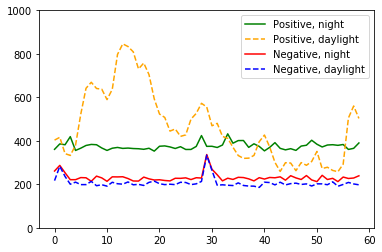

In [77]:
# Plot the feature distances along the timeline
f, ax = pyplot.subplots(1)
xdata = range(feature_array.size)
ax.plot(xdata, feat_array_1, color='green', label='Positive, night')
ax.plot(xdata, feat_array_2, color='orange', label='Positive, daylight', linestyle='dashed')
ax.plot(xdata, feat_array_3, color='red', label='Negative, night')
ax.plot(xdata, feat_array_4, color='blue', label='Negative, daylight', linestyle='dashed')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_ylim(top=1000)
pyplot.show(f)